# Data Exploration

## Imports

In [29]:
# Data and Datasets
import pandas as pd
import numpy as np

# SciKitLearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

# Evaluation and Metrics
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

# utils
import joblib # Allows for saving models

In [2]:
df = pd.read_csv('star_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

No missing values

In [4]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [5]:
duplicate_rows = df[df.duplicated()]

No duplicated rows.

In [6]:
df.shape

(100000, 18)

There are 100,000 instances in the dataset and 18 features.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237665e+18,8.438560e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
rerun_ID,100000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


Lots of big numbers.

### Splitting dataset into x and y

In [8]:
df_ = df.drop(columns = ['obj_ID','rerun_ID','spec_obj_ID'])
# Dropping irrelevant columns like ID numbers

In [9]:
train_set, test_set = train_test_split(df_, test_size=0.2, random_state=28)

In [10]:
X = train_set.drop(columns = ['class'])
y = train_set['class']

### Plotting a correlation matrix

             alpha     delta         u         g         r         i  \
alpha     1.000000  0.141471 -0.005502 -0.024739 -0.031739 -0.029727   
delta     0.141471  1.000000 -0.029602 -0.015707 -0.004426  0.004327   
u        -0.005502 -0.029602  1.000000  0.850379  0.689962  0.564351   
g        -0.024739 -0.015707  0.850379  1.000000  0.906722  0.790329   
r        -0.031739 -0.004426  0.689962  0.906722  1.000000  0.957678   
i        -0.029727  0.004327  0.564351  0.790329  0.957678  1.000000   
z        -0.029767  0.004862  0.496220  0.717204  0.909539  0.977884   
run_ID   -0.013702 -0.302002  0.105510  0.121771  0.120675  0.112167   
cam_col   0.012424  0.034535  0.004811  0.006660  0.007146  0.006755   
field_ID -0.060506 -0.115539 -0.011152 -0.011998 -0.011905 -0.012167   
redshift -0.018868  0.024189  0.330599  0.509538  0.571531  0.581421   
plate    -0.010206  0.131202  0.406093  0.582425  0.675843  0.684417   
MJD       0.002026  0.146354  0.406104  0.581363  0.673592  0.68

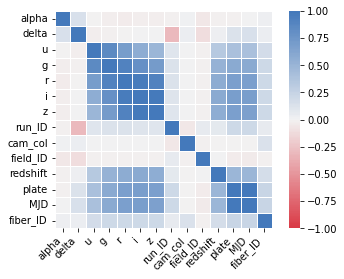

In [11]:
# plotting a correlation matrix
spearman_corr = train_set.corr(method='spearman')
print(spearman_corr)
ax = sns.heatmap(
    spearman_corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 250, n=200),
    square=True, annot=False, fmt='.1f', linewidths=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax;

<Figure size 432x288 with 0 Axes>

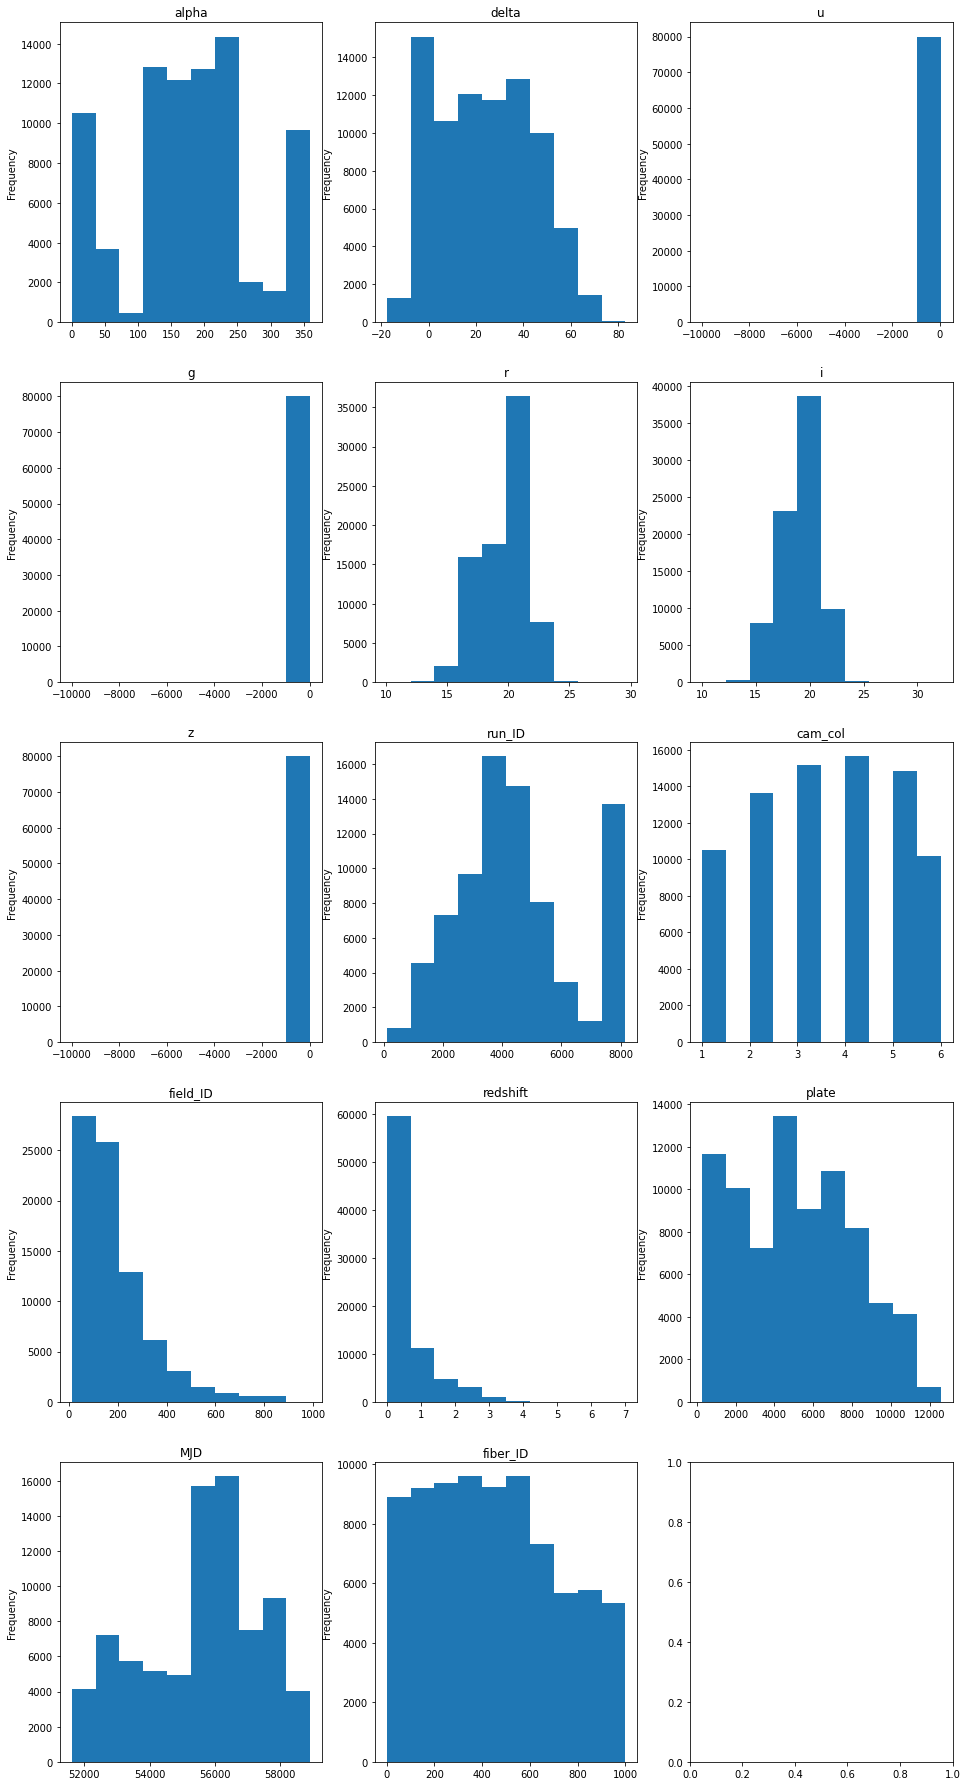

In [12]:
fig = plt.figure()

# make space for a 5x3 grid of graphs, enough for 15 (we have 14 to plot)
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(16,32))

# unpack all the axes subplots
axs = axs.ravel()

# assign the plot to each subplot in axe
for i, c in enumerate(X.columns):
    X[c].plot(kind='hist', title=c, ax=axs[i])

U, g and z are all the same??

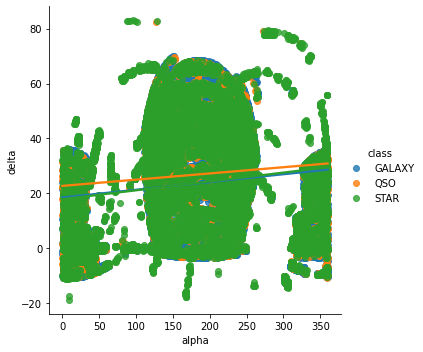

In [27]:
sns.lmplot(data=df, x='alpha', y='delta', hue='class')

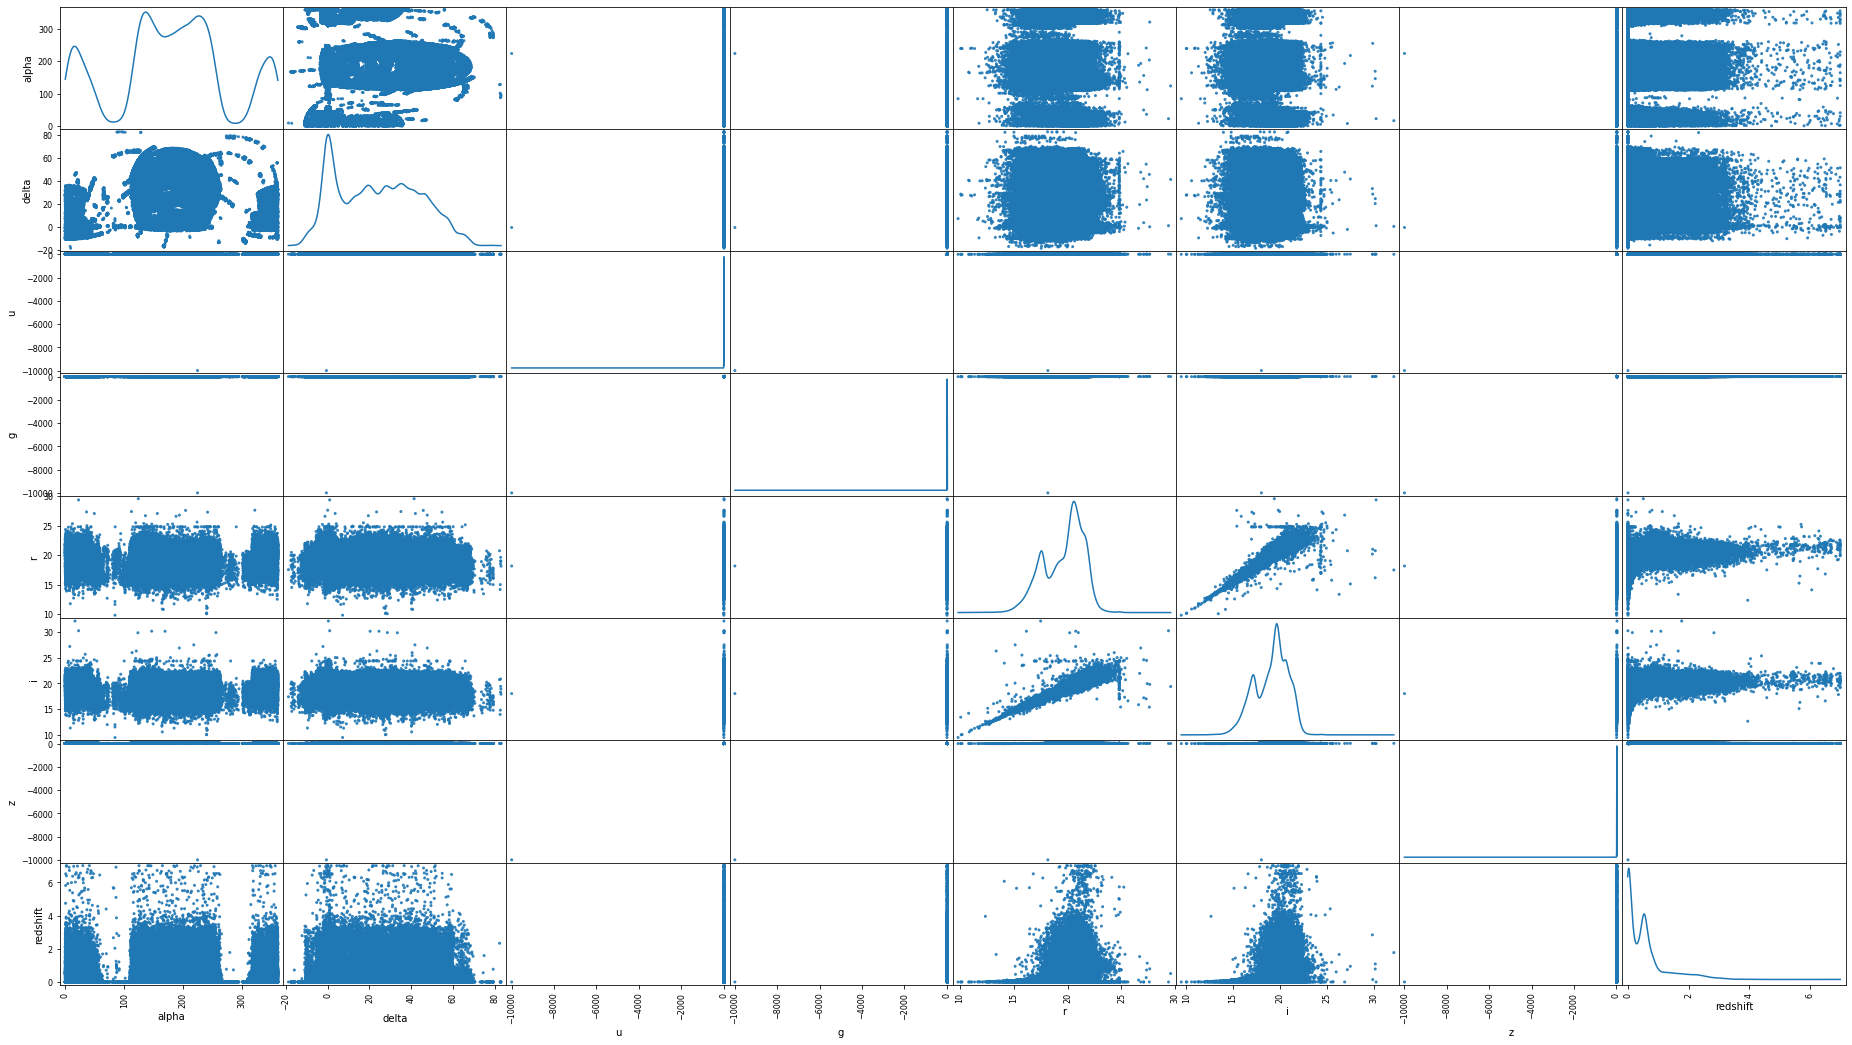

In [14]:
from pandas.plotting import scatter_matrix
attributes = ['alpha','delta','u','g','r','i','z','redshift']
scatter_matrix(df_[attributes], alpha=0.9, figsize=(32,18), diagonal='kde');

Alpha and delta, redshift, r, and i produce 3 distinct clusters. r and i have a strong positive correlation, some outliers present. Also a weird corner pattern.

## Class Imbalance

<AxesSubplot:title={'center':'Class distribution'}, ylabel='class'>

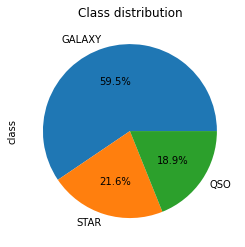

In [15]:
y.value_counts().plot(kind='pie', title='Class distribution', autopct='%1.1f%%')

Our threshold for saying an algorithm has 'learned' something will be 59.5% accuracy at detecting a galaxy.

In [16]:
# TODO
# One hot encode class
# Figure out what the columns mean - is there a reason U G R I Z are correlated?
# PCA may be necessary
# Scaling 100% necessary as big numbers present in the dataset will slow classifiers down
# Examine class imbalance
# feature importance

In [17]:
# MinMaxScaler for neural networks
# StandardScaler for everything else - less affected by outliers

## Pre-Processing

In [18]:
std_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])
X_scaled = std_pipeline.fit_transform(X)

In [19]:
X_scaled

array([[-6.36963102e-04, -1.31359357e+00,  8.40488628e-02, ...,
        -4.54100573e-01, -2.08262259e-01,  1.62181420e+00],
       [-1.48099163e+00, -1.27846451e+00, -2.37308854e-02, ...,
        -3.02889302e-01, -5.91482474e-02, -2.98674721e-01],
       [-1.48352208e+00, -1.25552064e+00, -7.19608094e-02, ...,
        -1.59884094e+00, -2.04843962e+00, -5.44702938e-01],
       ...,
       [ 4.28468456e-01,  1.18428878e+00,  1.18358974e-01, ...,
         1.13615488e+00,  1.05092273e+00,  6.74421958e-01],
       [ 4.34218865e-01,  1.53551392e+00, -5.32707350e-02, ...,
        -1.34276279e+00, -1.61048625e+00, -4.82277868e-01],
       [ 2.58458997e-01,  2.09496409e+00, -9.19080245e-02, ...,
        -1.53219973e+00, -1.94903028e+00,  4.24721678e-01]])

## Testing and Training

### SVM Classifier

In [20]:
svm_classifier = svm.SVC(kernel='rbf')
svm_classifier.fit(X_scaled, y)
y_pred = svm_classifier.predict(X_scaled)
svm_f1_training_score = f1_score(y, y_pred, average='weighted')
svm_f1_training_score

0.9586270839426585

In [21]:
svm_scores = cross_val_score(svm_classifier, X_scaled, y, scoring='f1_weighted', cv=10)
svm_scores

array([0.95398127, 0.95923142, 0.95912536, 0.95438556, 0.95175863,
       0.95891045, 0.9547395 , 0.95979775, 0.9547678 , 0.95907995])

In [30]:
# Save the model
joblib.dump(svm_classifier, "svm_classifier.pkl")
# my_model_loaded = joblib.load("my_model.pkl") to load later

['svm_classifier.pkl']

### Decision Tree Classifier

In [22]:
# Training
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_scaled, y)

DecisionTreeClassifier()

In [23]:
# Testing on training set
y_pred = dt_classifier.predict(X_scaled)
dt_f1_training_score = f1_score(y, y_pred, average='weighted')
dt_f1_training_score

1.0

In [24]:
# Testing on test set
dt_scores = cross_val_score(dt_classifier, X_scaled, y, scoring='f1_weighted', cv=10)
dt_scores

array([0.96322985, 0.96704115, 0.96360095, 0.9661905 , 0.96270923,
       0.96509348, 0.96362555, 0.96747345, 0.96581719, 0.96647472])

In [31]:
# Save the model
joblib.dump(dt_classifier, "dt_classifier.pkl")

['dt_classifier.pkl']

### Random Forest Classifier

In [25]:
# Train and give weighted f1 score on training set to give an idea of 
# under/over-fitting
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_scaled, y)
y_pred = rf_classifier.predict(X_scaled)
rf_f1_training_score = f1_score(y, y_pred, average='weighted')
rf_f1_training_score

1.0

In [34]:
rf_scores = cross_val_score(rf_classifier, X_scaled, y, scoring='f1_weighted', cv=10)
rf_scores

array([0.97596378, 0.97875753, 0.97784289, 0.97685705, 0.97302189,
       0.9792682 , 0.97980182, 0.9793796 , 0.97801019, 0.97713684])

In [32]:
# Save the model
joblib.dump(rf_classifier, "rf_classifier.pkl")

['rf_classifier.pkl']

In [33]:
rf_scores

array([0.97696572, 0.97839289, 0.97682543, 0.97686358, 0.97441126,
       0.97900464, 0.97915887, 0.97950352, 0.97825637, 0.97587354])